## Imports

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import silhouette_score, davies_bouldin_score



import os
os.environ['OMP_NUM_THREADS'] = '1'

## importing wine data

In [2]:
df = pd.read_csv('wine.data')

In [3]:
df.head()

1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  \
0  1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
1  1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
2  1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
3  1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   
4  1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05  2.85   

   1065  
0  1050  
1  1185  
2  1480  
3   735  
4  1450

## Numerical exploratory

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


## spliting dataset

In [5]:
#removing class label and excluding the target class
X = df.iloc[:, 1:] 

In [6]:
X

14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  3.92  \
0    13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05  3.40   
1    13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03  3.17   
2    14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86  3.45   
3    13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04  2.93   
4    14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05  2.85   
..     ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   ...   
172  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64  1.74   
173  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70  1.56   
174  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59  1.56   
175  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60  1.62   
176  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61  1.60   

     1065  
0    1050  
1    1185  
2    1480  
3     735  
4    1450  
..    ...  
172   740  
173   750  
174   835  
175   840  
176   560  

[177 rows x 13 columns]

In [7]:
# Function to load the Wine dataset
def load_wine():
    # Load the Wine dataset from UCI Machine Learning Repository
    wine_data = pd.read_csv('wine.data', header=None)
#     wine_data = pd.read_csv('wine_data.csv')

    # Remove class label and target column
    X = wine_data.iloc[:, 1:]
#     X = wine_data.iloc[1:, :13]
    
    # Normalize the input attributes
#     scaler = MinMaxScaler()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
#     X_scaled = minmax_scale(X)

    return X_scaled

In [8]:
# # Task 1: K-means clustering with different K values
def kmeans_clustering(X_scaled):
    k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    kmeans_results = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X_scaled)
        kmeans_results.append(kmeans)
        
        labels = kmeans.labels_
        
        # Calculate WSS and BSS
        wss = kmeans.inertia_
        bss = kmeans.score(X_scaled) * X_scaled.shape[0]
        
        # Calculate Silhouette coefficient
        silhouette_avg = silhouette_score(X_scaled, labels)
        
        # Calculate Davies-Bouldin index
        db_index = davies_bouldin_score(X_scaled, labels)
        
        # Plot the cluster assignments
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow')
        plt.title(f'K-means clustering with K={k}')
        plt.show()
        
        # Print the evaluation metrics
        print(f'K={k}: WSS={wss:.2f}, BSS={bss:.2f}, Silhouette={silhouette_avg:.2f}, DB Index={db_index:.2f}')
        

    return kmeans_results

In [9]:
# Task 2: Comparison of cluster groupings with actual class structure
def compare_clusters_with_classes(kmeans_results):
    wine_data = pd.read_csv('wine.data', header=None)
#     wine_data = pd.read_csv('wine_data.csv')
    
    #get actual class
    actual_classes = wine_data.iloc[:, 0]
#     actual_classes = wine_data.iloc[1:, 13]
#     actual_classes = actual_classes.values.flatten()

    for kmeans in kmeans_results:
        cluster_labels = kmeans.labels_
        accuracy = sum(cluster_labels == actual_classes) / len(actual_classes)
        print(f"Accuracy for K={kmeans.n_clusters}: {accuracy}")
        
      


In [10]:
#Task 3: Hierarchical clustering with different linkage methods
def hierarchical_clustering(X_scaled):
    linkage_methods = ['single', 'complete', 'average']
    hierarchical_results = []

    for method in linkage_methods:
        hierarchical = AgglomerativeClustering(n_clusters=3, linkage=method)
        hierarchical.fit(X_scaled)
        linkage_matrix = linkage(X_scaled, method=method)
        hierarchical_results.append(linkage_matrix)

    return hierarchical_results

In [11]:
# Visualization of hierarchical clustering results
def visualize_hierarchical_clusters(hierarchical_results):  
    for i, method in enumerate(['single', 'complete', 'average']):
        plt.figure(figsize=(12, 8))
        plt.title(f'{method.capitalize()} Linkage')
        plt.xlabel('Data Points')
        plt.ylabel('Distance')
        dendrogram(hierarchical_results[i])
        plt.savefig(f'hierarchical_clustering_{method}.png')

    plt.tight_layout()
    plt.show()


*********************** DIFFERENT K VALUE SCATTER PLOT AND PERFORMANCE ******************************************: 
*********************** DIFFERENT K VALUE SCATTER PLOT AND PERFORMANCE ******************************************: 


C:\Users\Nyars\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


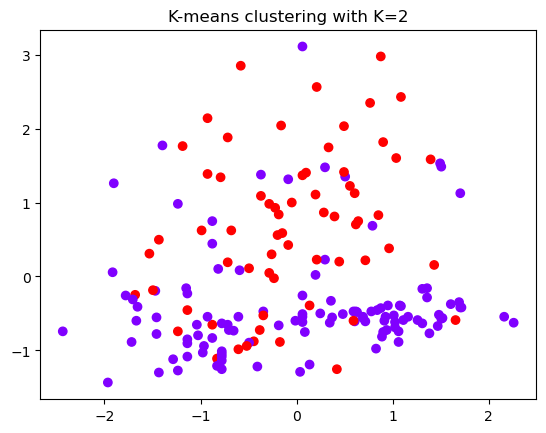

K=2: WSS=1659.01, BSS=-295303.42, Silhouette=0.27, DB Index=1.45


C:\Users\Nyars\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


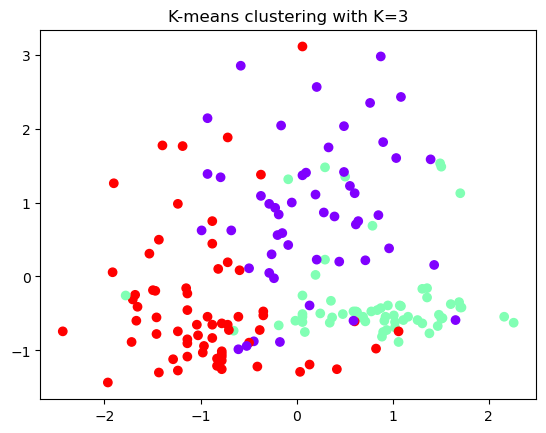

K=3: WSS=1277.93, BSS=-227471.27, Silhouette=0.28, DB Index=1.39


C:\Users\Nyars\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


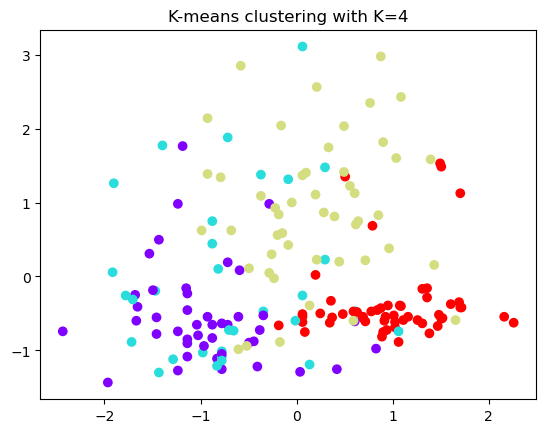

K=4: WSS=1175.71, BSS=-209275.52, Silhouette=0.25, DB Index=1.82


C:\Users\Nyars\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


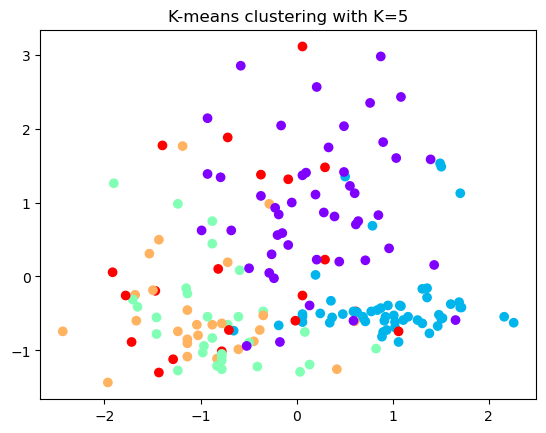

K=5: WSS=1104.86, BSS=-196665.38, Silhouette=0.23, DB Index=1.69


C:\Users\Nyars\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


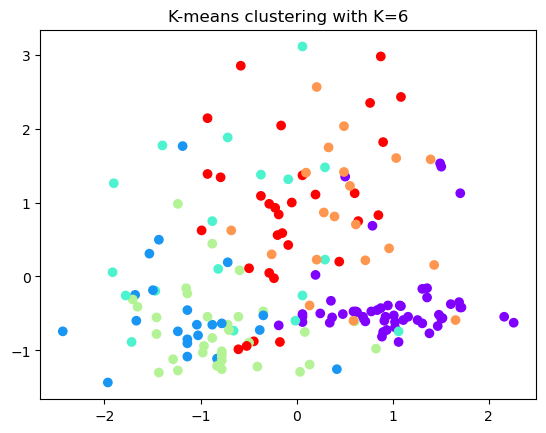

K=6: WSS=1042.39, BSS=-185544.92, Silhouette=0.20, DB Index=1.83


C:\Users\Nyars\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


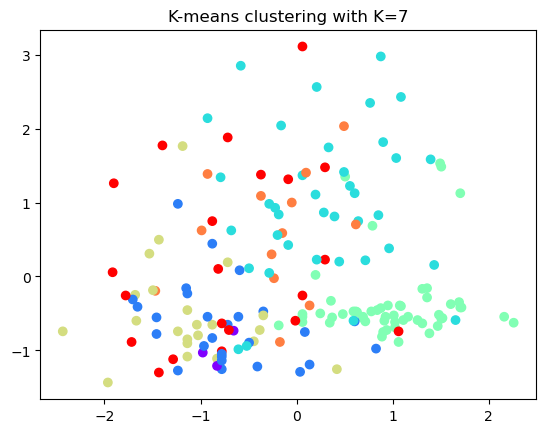

K=7: WSS=988.05, BSS=-175873.49, Silhouette=0.21, DB Index=1.60


C:\Users\Nyars\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


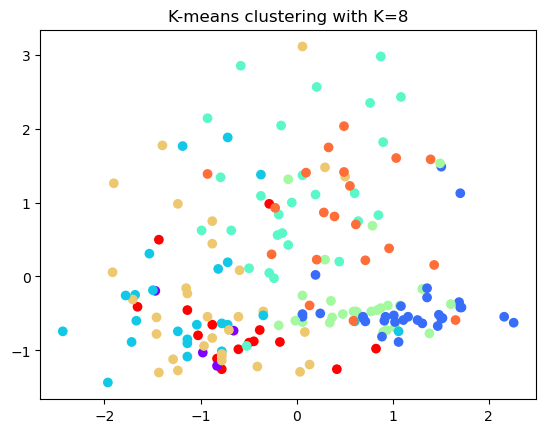

K=8: WSS=940.71, BSS=-167446.05, Silhouette=0.14, DB Index=1.83


C:\Users\Nyars\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


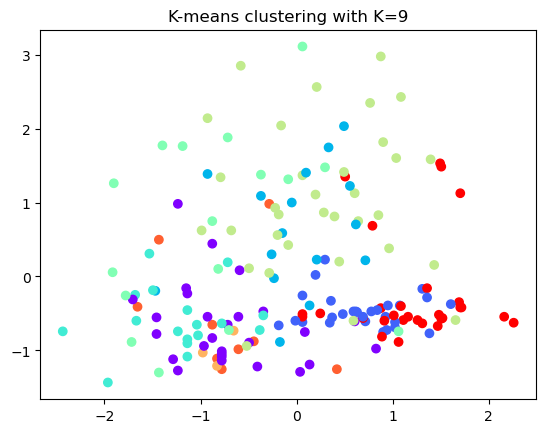

K=9: WSS=902.08, BSS=-160569.94, Silhouette=0.15, DB Index=1.75


C:\Users\Nyars\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


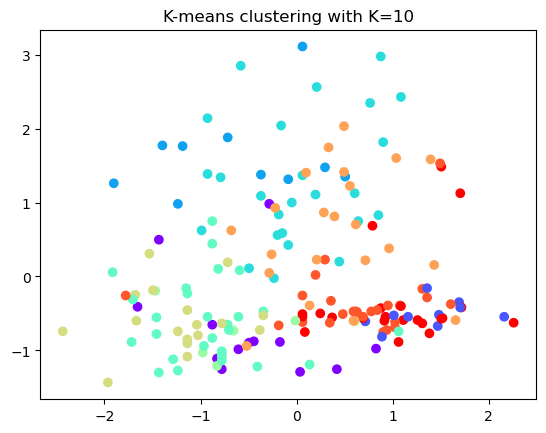

K=10: WSS=866.80, BSS=-154290.25, Silhouette=0.13, DB Index=1.75

*********************** ACCURACY SECTION  ********************************************: 
*********************** ACCURACY SECTION  ********************************************: 
Accuracy for K=2: 0.0
Accuracy for K=3: 0.6966292134831461
Accuracy for K=4: 0.033707865168539325
Accuracy for K=5: 0.46629213483146065
Accuracy for K=6: 0.07865168539325842
Accuracy for K=7: 0.016853932584269662
Accuracy for K=8: 0.4550561797752809
Accuracy for K=9: 0.15730337078651685
Accuracy for K=10: 0.2303370786516854

*********************** VISUALIZATION SECTION  ********************************************: 
*********************** VISUALIZATION SECTION  ********************************************: 


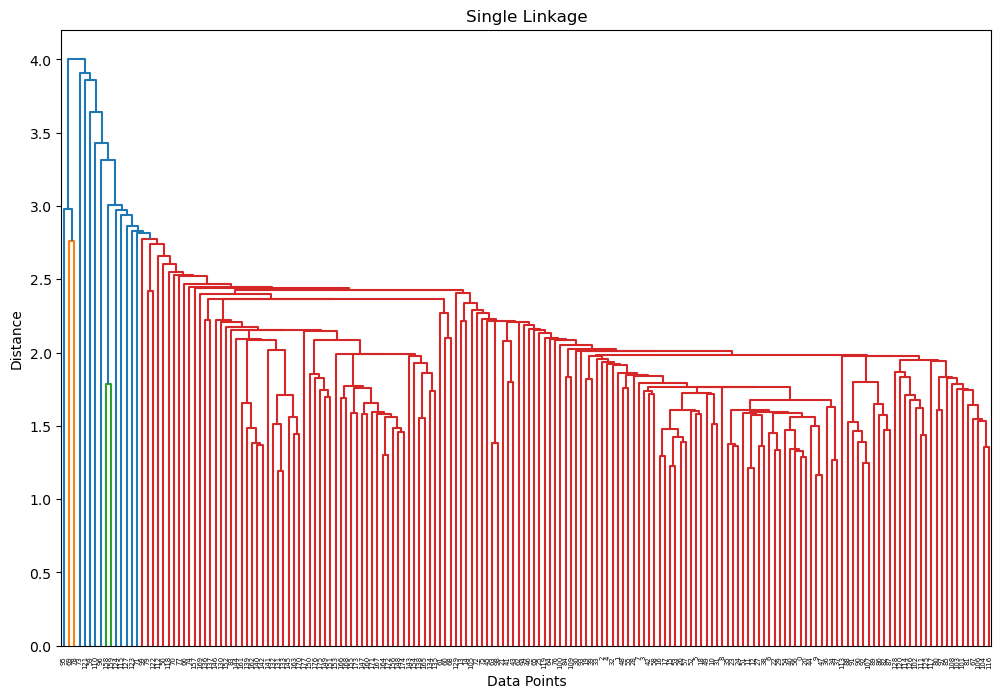

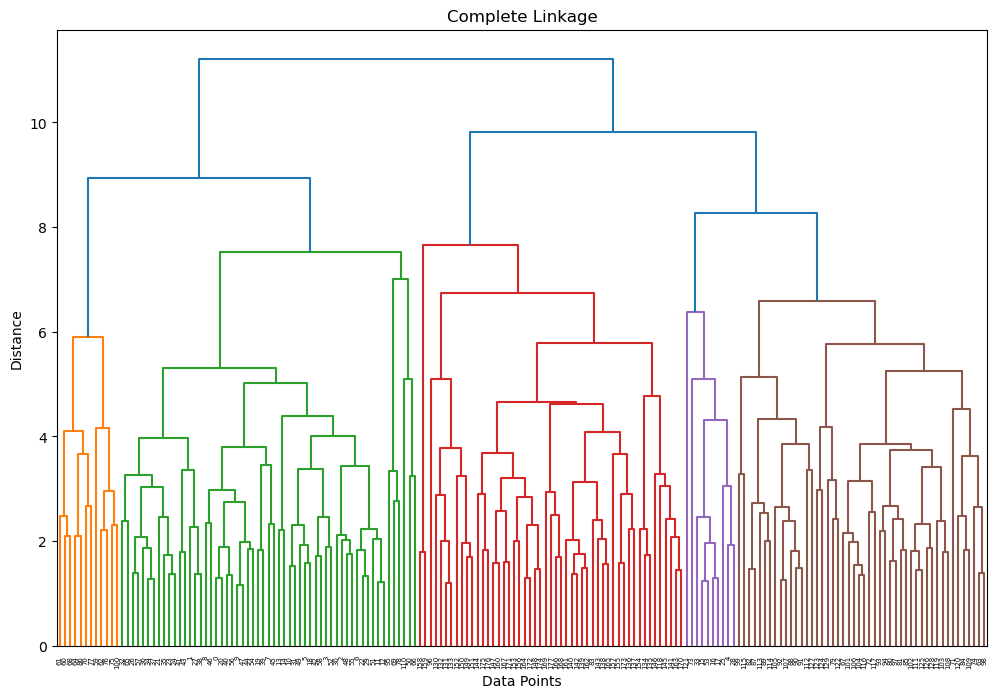

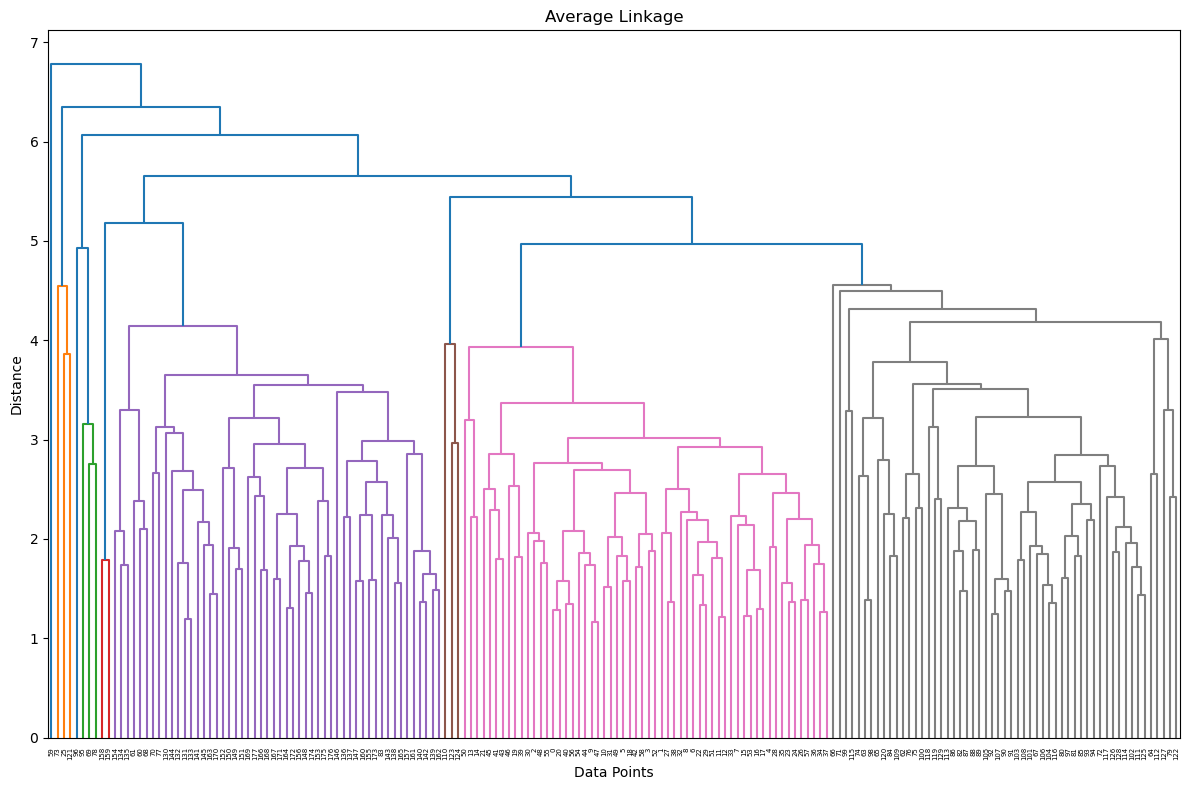

In [17]:
# Load the Wine dataset
X_scaled = load_wine()


print()
print("*********************** DIFFERENT K VALUE SCATTER PLOT AND PERFORMANCE ******************************************: ")
print("*********************** DIFFERENT K VALUE SCATTER PLOT AND PERFORMANCE ******************************************: ")


# Task 1: Apply K-means clustering with different K values
kmeans_results = kmeans_clustering(X_scaled)


print()
print("*********************** ACCURACY SECTION  ********************************************: ")

print("*********************** ACCURACY SECTION  ********************************************: ")

# Task 2: Compare cluster groupings with actual class structure
compare_clusters_with_classes(kmeans_results)

# Task 3: Apply hierarchical clustering and visualize hierarchical structures
hierarchical_results = hierarchical_clustering(X_scaled)

print()
print("*********************** VISUALIZATION SECTION  ********************************************: ")
print("*********************** VISUALIZATION SECTION  ********************************************: ")
#task 4: apply visualisation
visualize_hierarchical_clusters(hierarchical_results)